<a href="https://colab.research.google.com/github/JakeSiewJK64/colabNotebooks/blob/master/wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# random forest
from sklearn.ensemble import RandomForestClassifier

# support vector machines
from sklearn.svm import SVC
from sklearn import svm

# neural network
from sklearn.neural_network import MLPClassifier

# metrics to measure results
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [153]:
!wget -O winequality-red.csv https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

--2020-12-21 11:10:24--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84199 (82K) [application/x-httpd-php]
Saving to: ‘winequality-red.csv’

winequality-red.csv 100%[===================>]  82.23K  --.-KB/s    in 0.1s    

2020-12-21 11:10:25 (770 KB/s) - ‘winequality-red.csv’ saved [84199/84199]



In [154]:
# restricting column display limit
pd.set_option("display.max_columns", 200)

# loading dataset into wine variable
wine = pd.read_csv("winequality-red.csv", sep=";")


In [155]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [156]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [157]:
# preprocessing data
bins = (2, 6.5, 8)
group_name = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_name)
wine['quality'].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [158]:
label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [159]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [160]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


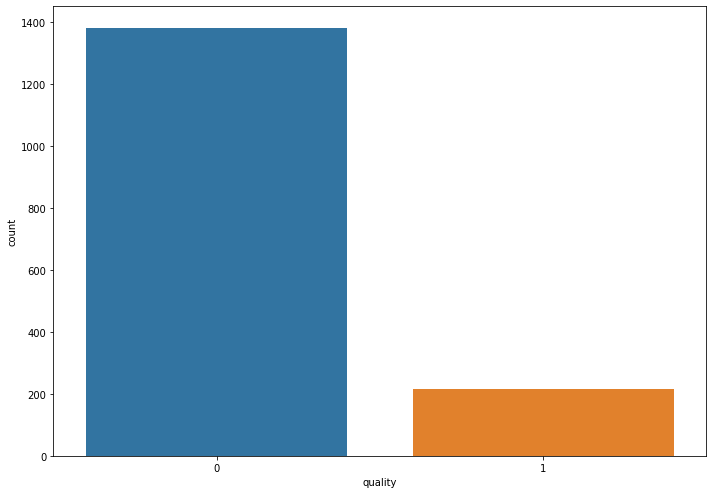

In [161]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(wine['quality'], ax = ax)

In [162]:
# separate the dataset as response variable and feature variables
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [163]:
# split to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [164]:
# applying standard scaling to get optimized result
# level the playing field
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Random Forest Classifier**

In [185]:
rfc = RandomForestClassifier(n_estimators=200)

# fit the RFC on training data
rfc.fit(X_train, y_train)

# generate prediction
rfc_pred = rfc.predict(X_test)

In [186]:
# see how our model performed
result = classification_report(y_test, rfc_pred)

# generating a confusion matrix
matrix = confusion_matrix(y_test, rfc_pred)

print(result)

print("Confusion Matrix")
print(matrix)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       273
           1       0.72      0.55      0.63        47

    accuracy                           0.90       320
   macro avg       0.82      0.76      0.79       320
weighted avg       0.90      0.90      0.90       320

Confusion Matrix
[[263  10]
 [ 21  26]]


# **SVM Classifier**

In [187]:
clf = svm.SVC()
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)

In [188]:
result = classification_report(y_test, clf_pred)
matrix = confusion_matrix(y_test, clf_pred)
print(result)

print("Confusion Matrix")
print(matrix)

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

Confusion Matrix
[[268   5]
 [ 35  12]]


# **Neural Network**


In [189]:
mlpc = MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=500)
mlpc.fit(X_train, y_train)
mlpc_pred = mlpc.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [193]:
result = classification_report(y_test, mlpc_pred)
matrix = confusion_matrix(y_test, mlpc_pred)
print(result)


print("Confusion Matrix")
print(matrix)

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       273
           1       0.61      0.57      0.59        47

    accuracy                           0.88       320
   macro avg       0.77      0.76      0.76       320
weighted avg       0.88      0.88      0.88       320

Confusion Matrix
[[256  17]
 [ 20  27]]


In [198]:
from sklearn.metrics import accuracy_score
rfc_cm = accuracy_score(y_test, rfc_pred)
svm_cm = accuracy_score(y_test, clf_pred)
nn_cm = accuracy_score(y_test, mlpc_pred)

print("Randon Forest Classifier: ", rfc_cm)
print("SVM: ", svm_cm)
print("Neural Network: ", nn_cm)  

Randon Forest Classifier:  0.903125
SVM:  0.875
Neural Network:  0.884375


In [199]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [211]:
Xnew = [[7.9, 0.68, 0.03, 2.1, 0.173, 9.1, 18.1, 0.9969, 3.37, 0.58, 9.6]]
Xnew = sc.transform(Xnew)

ynew = rfc.predict(Xnew)
print("Random Forest Classifier", ynew)

ynew = clf.predict(Xnew)
print("SVM", ynew)

ynew = mlpc.predict(Xnew)
print("Multilevel Perceptron", ynew)

Random Forest Classifier [0]
SVM [0]
Multilevel Perceptron [0]
